# Linear Regression



<font color="blue"> Jugal Patel </font>

# A. Introduction
For this assignment I have use black friday dataset from kaggle. I am going to use to linear regression methods in this assignment- Least Square, Least Mean Squares. I will be using black friday sales dataset for both methods least square and least mean square


# B. Data



## 1. Description
I have us black friday sales data set. This data set contains 550k observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. It contains 12 attributes :- 
- User_ID
- Product_ID
- Gender
- Age
- OccupationId 
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category_1
- Product_Category_2
- Product_Category_3
- Purchase 
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [7]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [8]:
df['Occupation'].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [9]:
df = df.drop(['User_ID', 'Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [10]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,F,0-17,10,A,2,0,8370
1,F,0-17,10,A,2,0,15200
2,F,0-17,10,A,2,0,1422
3,F,0-17,10,A,2,0,1057
4,M,55+,16,C,4+,0,7969


## 2. Plots for understanding or analysis


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df.shape

(537577, 7)

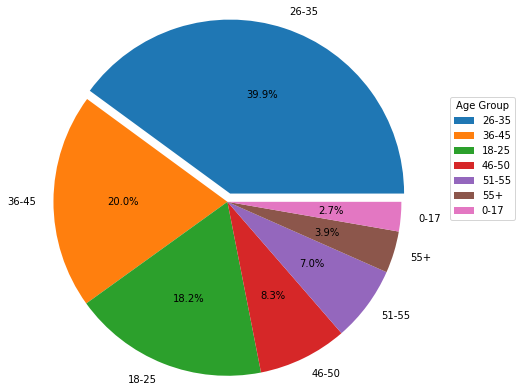

In [13]:
age_cnt = df['Age'].value_counts()
fig, ax = plt.subplots()
a,b,c = ax.pie([x*100/df.shape[0] for x in age_cnt.values], autopct='%1.1f%%',explode=[0.1,0,0,0,0,0,0],labels=age_cnt.keys(), radius=2)
txt = ax.legend(age_cnt.keys(),loc='center left',bbox_to_anchor=(1.5, 0.7), title='Age Group')

* 

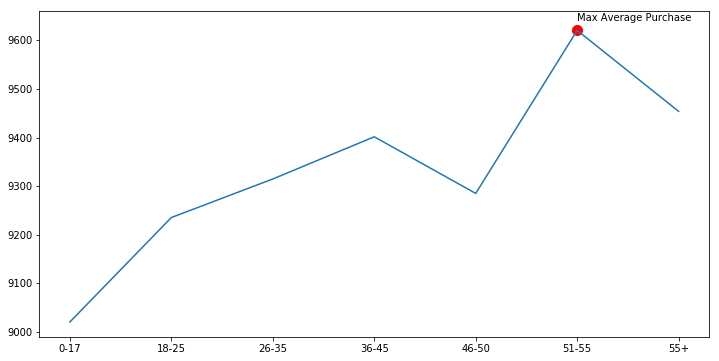

In [14]:
purchase_by_age = df.groupby(['Age'])['Purchase'].mean()
fig = plt.figure(figsize=(12,6))
txt = plt.plot(purchase_by_age.keys(), purchase_by_age.values)
txt = plt.scatter(purchase_by_age.keys()[np.argmax(purchase_by_age.values)], purchase_by_age.max(),s=100,color='red')
txt = plt.text(purchase_by_age.keys()[np.argmax(purchase_by_age.values)], purchase_by_age.max()+20, s='Max Average Purchase')

Text(0, 0.5, 'Average purchase $')

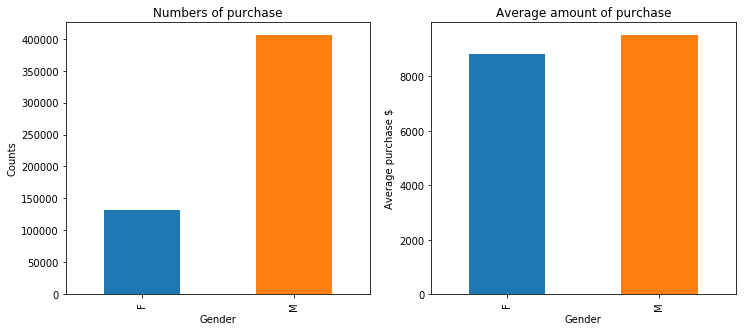

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1 = df['Gender'].value_counts().sort_index().plot(kind='bar',ax=axes[0], title='Numbers of purchase')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Counts')
ax2 = df.groupby(['Gender'])['Purchase'].mean().sort_index().plot(kind='bar',ax=axes[1], title='Average amount of purchase')
ax2.set_ylabel('Average purchase $')

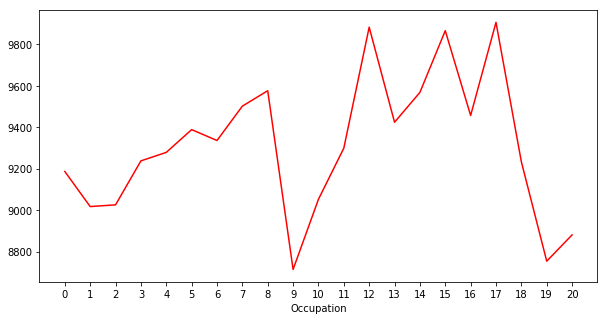

In [16]:
plt.figure(figsize=(10,5))
ax1 = df.groupby(['Occupation'])['Purchase'].mean().plot(kind='line',color='red')
dump = ax1.set_xticks(df['Occupation'].unique())

## 3. Preprocessing of the data

* Dropping null values

In [22]:
df = df.dropna()

* Seprating x and y values from original data

In [23]:
df_x = df.loc[:,df.columns!='Purchase']
df_y = df['Purchase']

* Since we have all categorial featues we need to encode them.
* here i have done one hot encoding using pandas get_dummies

In [24]:
df_x_encoded = pd.get_dummies(df_x,columns=df_x.columns)
df_x_encoded.head()

,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,...,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Marital_Status_0,Marital_Status_1
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


# C. Method


## 1. Review
I am going to use gender, age, occupation, city_category, stay_in_current_city and maritial_status as an input and predict the purchase using two linear regression methods LS and LMS.


## 2. Explanation of code
I am going to use two different linear regression models.

Least Square (LS):

LS is matrix based implementaion.
In least square we use all of the data at once for finding weight matrix w.
Equation for LS is  𝑤=(𝑋⊤𝑋)−1𝑋⊤𝑇 . Where X is input and T is output.

LMS:

Unlike in LS, LMS dont use all data at once. It iterate over data one after another.
In LMS wight matrix got updated after each iteration.



## 3. Correct Implementation

### Super Classs Definition

In [25]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [26]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.pinv(X.T@X)@X.T@T
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X@self.w

### Least Mean Squares

In [27]:
a = np.array([[1]])
b = np.array([1])
a-b

array([[0]])

In [28]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for sample,t in zip(X,T):
            self.train_step(sample, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.insert(x,0,1)
        if self.w is None:
            self.w = np.zeros(x.shape[0])
        yhat = x@self.w
        error = yhat - t
        self.w -= self.alpha * error * x
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return np.atleast_2d(X@self.w).T
        

### Usage Examples

In [29]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

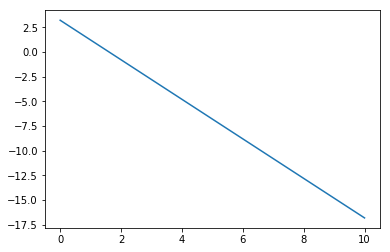

In [30]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

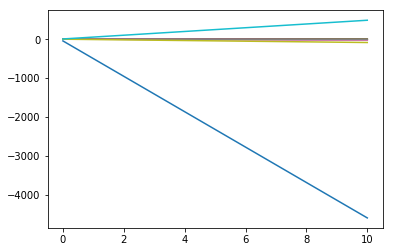

In [31]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

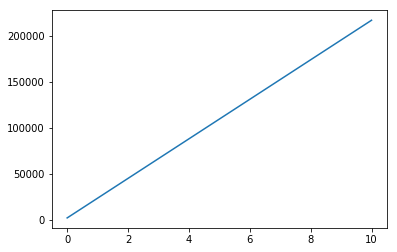

In [32]:
lms.train(X, T)
plt.plot(lms.use(X))

# D. Experiments


## 1. Description, Codes


In [33]:
def rmse(T, Y):
    assert T.shape == Y.shape
    return np.sqrt(np.sum((T-Y)**2))/T.shape[0]

### LS training

In [34]:
ls1 = LinearRegress()
ls1.train(df_x_encoded.values, df_y.values)

In [35]:
ls_output = ls1.use(df_x_encoded.values)

### LMS training

In [36]:
res = {}

In [46]:
def train_and_test(alpha):
    lms_ob = LMS(alpha)
    lms_ob.train(df_x_encoded.values, df_y.values)
    lms_output = lms_ob.use(df_x_encoded.values)
    
    plt.figure(figsize=(12,5))
    plt.plot(lms_output[:500])
    plt.plot(df_y.values[:500])

    print("RMSE : ",rmse(lms_output, np.atleast_2d(df_y.values).T))

    res[alpha] = rmse(lms_output, np.atleast_2d(df_y.values).T)

* **Aplha :  0.1**

RMSE :  8.797087332708177


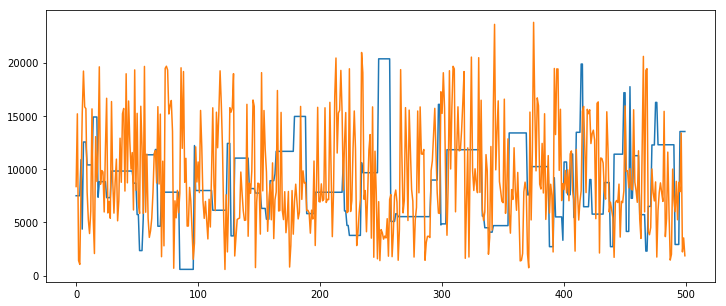

In [47]:
train_and_test(0.1)

* **Alpha : 0.01**

RMSE :  7.009886256442101


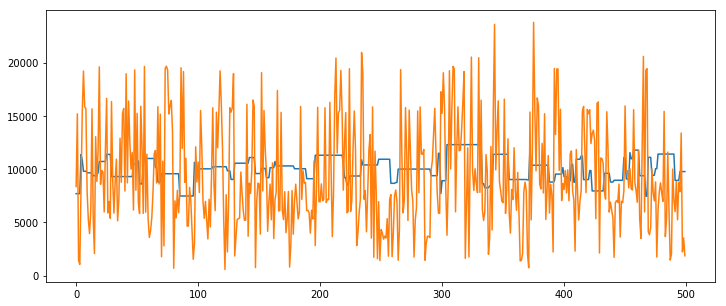

In [48]:
train_and_test(0.01)

* **Alpha : 0.001**

RMSE :  6.763463199130724


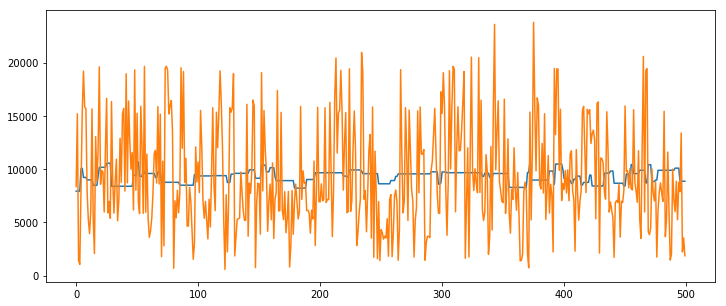

In [49]:
train_and_test(0.001)

* **Alpha : 0.0001**

RMSE :  6.755852428053138


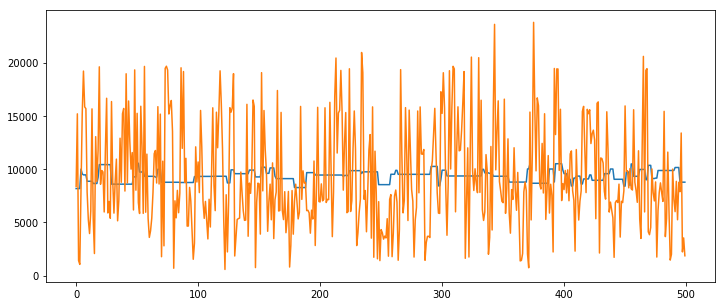

In [50]:
train_and_test(0.0001)

* **Alpha : 0.00001**

RMSE :  6.765977919107797


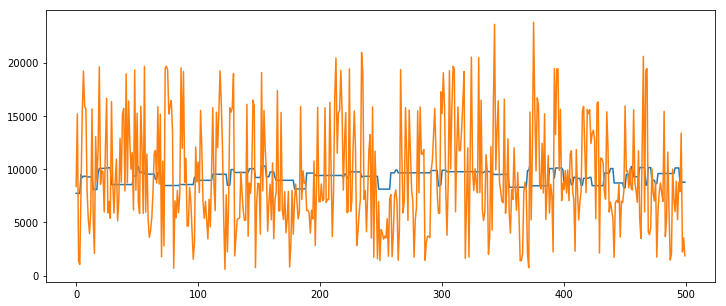

In [51]:
train_and_test(0.00001)

## 2. Visualization of results

* LinearRegress output visualization

In [52]:
print("Rmse for LinearRegress:",rmse(ls_output,df_y.values))

Rmse for LinearRegress: 6.754531586849418


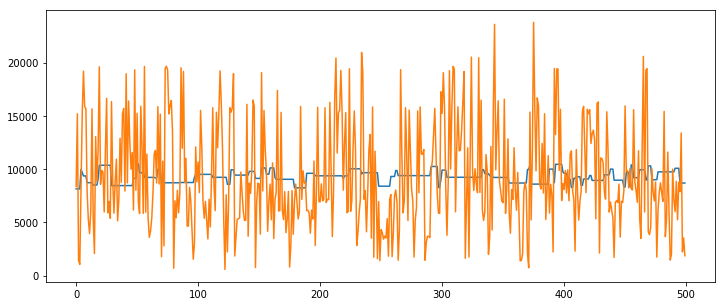

In [55]:
plt.figure(figsize=(12,5))
plt.plot(ls_output[:500])
plt.plot(df_y.values[:500])

[Text(0, 0, '0.1'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.001'),
 Text(0, 0, '0.0001'),
 Text(0, 0, '1e-05')]

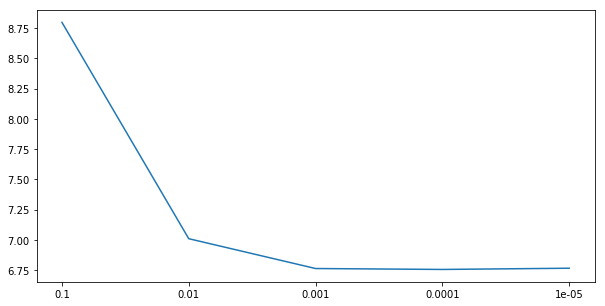

In [56]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax1.plot(range(len(res)),res.values())
ax1.xaxis.set_ticks(range(len(res)))
ax1.xaxis.set_ticklabels(list(res.keys()))

## 3. Analysis/Comparision of algorithms
* As from plots of LinearRegress results we can see that data is centered around ~9000. But output interval is small.
* I have created plots for LMS for multiple values of **alphas** ranging from 0.1 to 0.000001.
* To compare differents models i have used RMSE loss.
* Results for differnet values of alphas as follows:
     - 0.1      8.79708733270817
     - 0.01     7.009886256442
     - 0.001    6.763463199
     - 0.0001   6.755852428053138
     - 0.00001  6.76597791910779
* From the result we can see that rmse stop decreasing notably after 0.001. We can say that **0.001**.

In [59]:
lms_ob = LMS(0.001)
lms_ob.train(df_x_encoded.values, df_y.values)
lms_output = lms_ob.use(df_x_encoded.values)

Text(0.5, 1.0, 'Original Values')

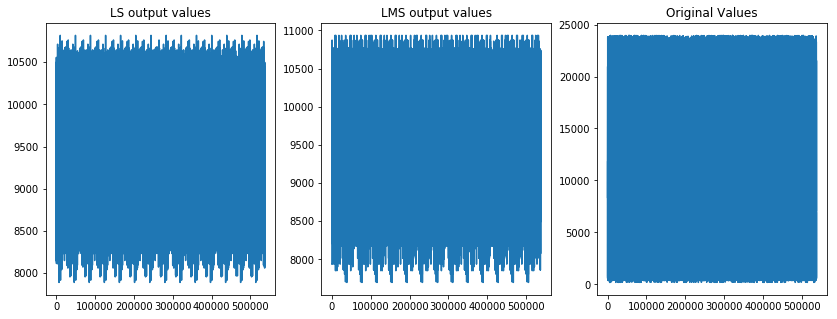

In [60]:
fig = plt.figure(figsize=(14,5))
plt.subplot(131)
plt.plot(ls_output)
plt.title('LS output values')
plt.subplot(132)
plt.plot(lms_output)
plt.title('LMS output values')
plt.subplot(133)
plt.plot(df_y.values)
plt.title('Original Values')

* From side by side comparision of two algorithms with original values we can see that even though LS gives same LMSE as LMS model, LMS model is better when comparing actual values.

# Conclusions
* The difference between LMS and LS is LMS is iterative method and we have one hyperparamter to tune for LMS method.
* Deciding learning rate alpha is one challange for LMS model.
* LS regression is faster if your data is small enough.
* For larger dataset LS method will take exponetitally more time to train because it uses inverse of matrix and the running time of that algorithm is **O(n^2.5)**.


# References
https://matplotlib.org/
https://stackoverflow.com/
https://uncc.instructure.com/courses/99514/pages/linear-model?module_item_id=1705136
https://uncc.instructure.com/courses/99514/modules/items/1705135
https://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression
https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b
https://datascience.stackexchange.com/questions/28353/always-drop-the-first-column-after-performing-one-hot-encoding
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.unique.html
https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.sort_index.html

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [49]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
